# Demo : Learn how to do math calculations

Author: Jim Xie

Date:   2020-08-07

In [1]:
import sys
#!{sys.executable} -m pip install seaborn==0.9.0
import seaborn
import random
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
#plt.figure(figsize=(15,10))

In [23]:
def random_data():
    x = random.randint(0,100)
    #x = random.random()
    return x

def generate_data(x1,x2):
    y = (x1 * x2)/2
    #y = (x1 + x2) /2
    return y

In [24]:
train_x = []
train_y = []
for i in range(20000):
    x1 = random_data()
    x2 = random_data()
    x = [x1,x2]
    train_x.append(x)
    y = generate_data(x1,x2)
    train_y.append(y)

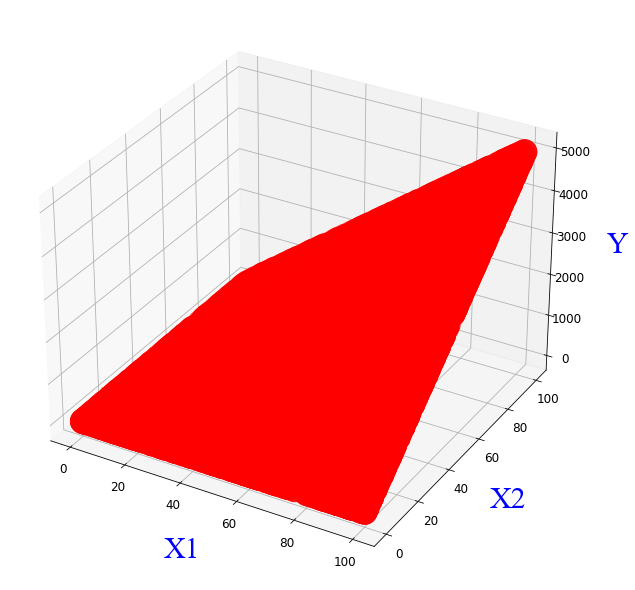

In [25]:
plt.style.use({'figure.figsize':(24, 8)})
fig = plt.figure()
ax = Axes3D(fig)
x1_axis = []
x2_axis = []
y_axis = []
for x,y in zip(train_x,train_y):
    x1_axis.append(x[0])
    x2_axis.append(x[1])
    y_axis.append(y) 
ax.scatter(x1_axis, x2_axis, y_axis,depthshade=True,s=600,c='r')
ax.ticklabel_format(style='plain',axis='both')    
font2 = {'family' : 'Times New Roman','weight' : 'normal','size'   : 30,"color":"blue"}
ax.set_xlabel("X1",font2,labelpad=20)
ax.set_ylabel("X2",font2,labelpad=20)
ax.set_zlabel("Y",font2,labelpad=20)
ax.grid(False)
plt.grid(linestyle=':')
plt.tick_params(labelsize=12)
plt.show()

In [26]:
model = LinearRegression() 
model.fit(train_x,train_y)

LinearRegression()

In [27]:
test_x = []
test_y = []
for i in range(20):
    x1 = random_data()
    x2 = random_data()
    test_x.append([x1,x2])
    y = generate_data(x1,x2)
    test_y.append(y)
pred_y = model.predict(test_x)
#pred_y = pred_y - 5
print("x1    x2     y")
for x,y in zip(test_x,test_y):
    print(x[0],"  ",x[1],"    ",y)

x1    x2     y
64    16      512.0
96    35      1680.0
96    47      2256.0
78    100      3900.0
88    63      2772.0
35    52      910.0
0    36      0.0
62    82      2542.0
9    41      184.5
60    90      2700.0
19    10      95.0
13    62      403.0
57    50      1425.0
64    30      960.0
49    77      1886.5
72    35      1260.0
87    52      2262.0
22    73      803.0
72    27      972.0
70    7      245.0


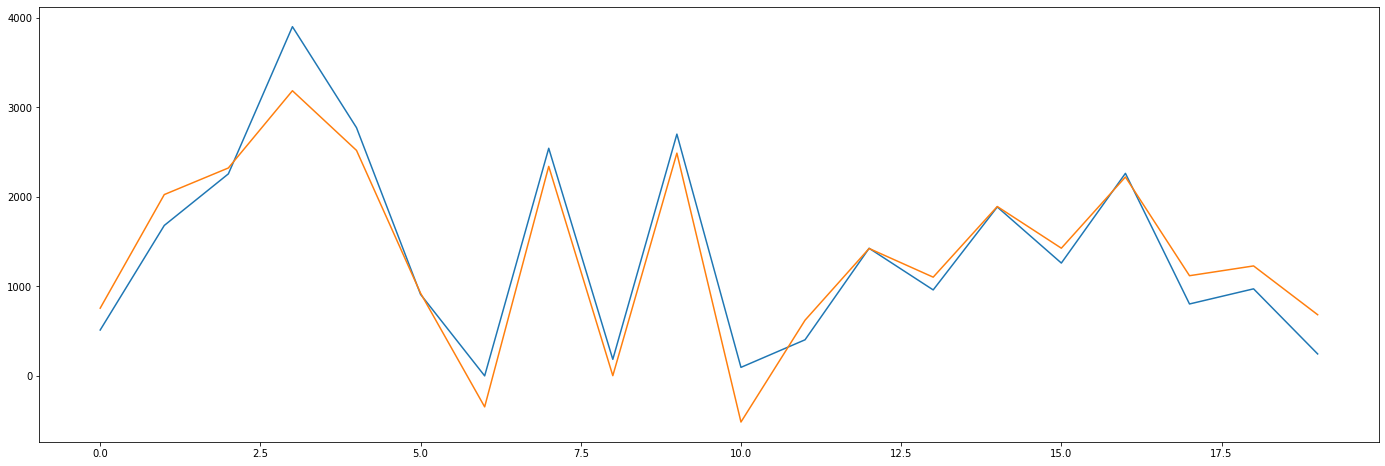

In [28]:
plt.plot(test_y)
plt.plot(pred_y)
plt.show()  

In [31]:
input_x1 = 10 #random_data()
input_x2 = 50 #random_data()
result = model.predict([[input_x1,input_x2]])
msg = "F(%.02f,%.02f)=%.02f"%(input_x1,input_x2,result[0])
print(msg)

F(10.00,50.00)=249.87


In [22]:
from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score

In [13]:
print(metrics.r2_score(test_y,pred_y,multioutput="uniform_average"))
print(metrics.r2_score(test_y,pred_y,multioutput="raw_values"))

0.8817614004179737
[0.8817614]


In [14]:
print(model.score(test_x,test_y))
print(metrics.r2_score(test_y, pred_y))

1.0
0.8817614004179737


In [15]:
metrics.explained_variance_score(test_y,pred_y)

1.0

In [16]:
e = metrics.mean_absolute_error(test_y,pred_y)
print("%0.8f"%e)

5.00000000


In [17]:
e = metrics.mean_squared_error(test_y,pred_y)
print("%0.8f"%e)

25.00000000


In [18]:
e = metrics.median_absolute_error(test_y,pred_y)
print("%0.8f"%e)

5.00000000
